In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
#fill missing values with median
df['CRIM'].fillna(df['CRIM'].median(), inplace=True)
df['ZN'].fillna(df['ZN'].median(), inplace=True)
df['INDUS'].fillna(df['INDUS'].median(), inplace=True)
df['CHAS'].fillna(df['CHAS'].median(), inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
#remove unwanted columns
df.drop(['ZN', 'CHAS'], axis=1, inplace=True)

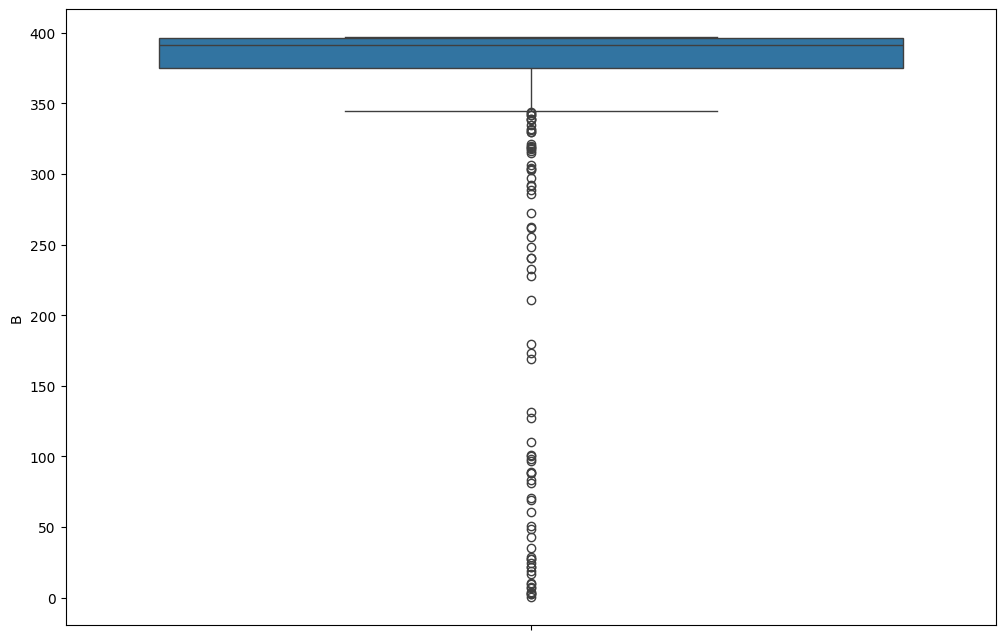

In [8]:
#visualize the outliers using boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df["B"])
plt.show()


In [9]:
#remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,0.684947,9.390848,0.516405,6.251203,61.241212,4.371195,6.263636,347.357576,18.431212,389.468758,11.158636,22.664242
std,1.396911,6.050566,0.098353,0.461004,26.995141,1.921831,5.934307,126.093127,1.836748,10.665463,5.302055,5.191429
min,0.006320,0.740000,0.389000,4.903000,2.900000,1.321600,1.000000,188.000000,14.700000,344.910000,1.980000,11.800000
25%,0.063015,5.130000,0.442000,5.929250,38.925000,2.750350,4.000000,276.000000,17.400000,387.997500,7.150000,19.400000
50%,0.143430,8.140000,0.501500,6.179000,65.150000,4.017150,5.000000,307.000000,18.600000,393.590000,10.295000,22.000000
75%,0.347322,10.810000,0.547000,6.544500,85.175000,5.720900,6.000000,398.000000,20.200000,396.900000,14.097500,24.775000
max,6.801170,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,29.930000,36.400000


In [10]:
#split the data into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
#make predictions on the test set
y_pred = model.predict(X_test)
#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 6.6378811955327
R^2 Score: 0.5829245512719718


In [13]:
#new data for prediction with 11 features
new_data = np.array([[0.1, 7.07, 0.0, 6.0, 45.0, 4.98, 24.0, 396.90, 18.72, 390.0, 8.43]])
new_pred = model.predict(new_data)
print("Prediction for new data:", new_pred)

Prediction for new data: [25.45954105]
